In [1]:
# Lectura del conjunto de datos utilizando Pandas
import pandas as pd
from datetime import datetime
dolar = pd.read_csv('dolarMEP.csv')
df = pd.read_csv('lista_prestamos.csv')
df

,Fecha,Destino,Edad,Ingresos,Zona geografica,Perfil,Plazo,Cuota,class
0,22/03/2024,Refaccion y construccion de vivienda,45,2000000,Buenos Aires,A,6,1,Al dia
1,18/03/2024,Decoracion,40,5000000,La Pampa,AA,6,1,Al dia
2,21/02/2024,Refaccion y construccion de vivienda,52,935000,Rio Negro,AA,18,1,Al dia
3,19/02/2024,Viaje,70,450000,Corrientes,AA,18,1,Al dia
4,06/02/2024,Refaccion y construccion de vivienda,57,326000,Buenos Aires,C,6,1,Al dia
...,...,...,...,...,...,...,...,...,...
401,10/01/2018,Decoracion,45,21600,Buenos Aires,F,48,48,+180 dias
402,09/01/2018,Otros destinos,36,14000,Santa Fe,D,48,48,+180 dias
403,04/01/2018,Refaccion y construccion de vivienda,50,30000,Buenos Aires,E,48,48,+180 dias
404,04/01/2018,Refaccion y construccion de vivienda,35,32355,Ciudad de Buenos Aires,D,48,48,+180 dias


In [2]:
# Realizamos una copia del original para no trabajar sobre esta
df_orig= df.copy()
df.head()

,Fecha,Destino,Edad,Ingresos,Zona geografica,Perfil,Plazo,Cuota,class
0,22/03/2024,Refaccion y construccion de vivienda,45,2000000,Buenos Aires,A,6,1,Al dia
1,18/03/2024,Decoracion,40,5000000,La Pampa,AA,6,1,Al dia
2,21/02/2024,Refaccion y construccion de vivienda,52,935000,Rio Negro,AA,18,1,Al dia
3,19/02/2024,Viaje,70,450000,Corrientes,AA,18,1,Al dia
4,06/02/2024,Refaccion y construccion de vivienda,57,326000,Buenos Aires,C,6,1,Al dia


In [3]:
# vemos que tipo de datos tiene el data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Fecha            406 non-null    object
 1   Destino          406 non-null    object
 2   Edad             406 non-null    int64 
 3   Ingresos         406 non-null    int64 
 4   Zona geografica  406 non-null    object
 5   Perfil           406 non-null    object
 6   Plazo            406 non-null    int64 
 7   Cuota            406 non-null    int64 
 8   class            406 non-null    object
dtypes: int64(4), object(5)
memory usage: 28.7+ KB


In [4]:
# Al analizar la base de datos, tendremos que hacer varias modificaciones para representarlo correctamente 
# para ingresos lo pasaremos a dolares utilizando una base de dato donde tenemos según meses el valor máximo de valor mep
# con respecto a la cuota lo dividiremos por el plazo para tener un porcentaje de avance de los pagos 
# con respecto a clases dividiremos en los que son "Al dia" -> "bueno" y todos los demas como "malo"
# cuando ingresemos una nueva entrada lo pasaremos por esta función 

dolar_prueba = dolar.copy()
df_prueba= df.copy()



def editor_fichero(fichero,fichero_dolar):

    def convertir_etiqueta(fichero): #empezamos por class
        fichero.loc[fichero['class'] == 'Al dia', 'class'] = 'Bueno'
        fichero.loc[fichero['class'] != 'Bueno', 'class'] = 'malo'
        return fichero
    

    #def convertir_cuota_en_porcentaje(fichero): #modificamos las cuotas por un porcentaje de avance del cuota/plazo
    #    fichero['porcentaje_Avance'] = fichero['Cuota']/fichero['Plazo']
    #    del fichero['Cuota']
    #    return fichero
    
    def pasar_ingresos_a_dolares(fichero, fichero_dolar):  #pasar a dolares los ingresos - sacamos el mayor dolar de cada mes y ese será el valor a convertir
       
        #transformamos las columnas de fecha a variable datetime
        fichero['Fecha'] = pd.to_datetime(fichero['Fecha'], dayfirst=True, errors='ignore')
        fichero_dolar['Fecha'] =pd.to_datetime(fichero_dolar['Fecha'], dayfirst=True, errors='ignore')

        #creamos una nueva columna del dolar para esa fecha en particular, luego los ingresos se dividiran por este dolar
        fichero['dolar']=""
        fichero['ingresos en dolares']=""

        for x in range(0,(len(fichero.index)),1):
            cond=False
            cont=0
            dia=pd.to_timedelta('1 days')


            while cond==False:
                cont=cont+1
                for y in range(0,(len(fichero_dolar.index)),1):
                    if (fichero.loc[(x,'Fecha')]+dia*cont)==fichero_dolar.loc[(y,'Fecha')]:
                        fichero.loc[(x,'dolar')] = fichero_dolar.loc[(y,'dolar')]
                        cond=True
                        break  

        fichero['ingresos en dolares'] = (fichero['Ingresos'] / fichero['dolar']).astype('float64')
        
        del fichero['Ingresos']
        del fichero['Fecha']
        del fichero['dolar']
        del fichero['Cuota']
        return fichero
    
    return pasar_ingresos_a_dolares(convertir_etiqueta(fichero),fichero_dolar)


editor_fichero(df_prueba, dolar_prueba)
df_prueba




C:\Users\UDLEA\AppData\Local\Temp\ipykernel_2044\2577576976.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  fichero['Fecha'] = pd.to_datetime(fichero['Fecha'], dayfirst=True, errors='ignore')
C:\Users\UDLEA\AppData\Local\Temp\ipykernel_2044\2577576976.py:29: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  fichero_dolar['Fecha'] =pd.to_datetime(fichero_dolar['Fecha'], dayfirst=True, errors='ignore')
C:\Users\UDLEA\AppData\Local\Temp\ipykernel_2044\2577576976.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fichero_dolar['Fecha'] =pd.to_datetime(fichero_dolar['Fecha'], dayfirst=True, errors='ignore')


,Destino,Edad,Zona geografica,Perfil,Plazo,class,ingresos en dolares
0,Refaccion y construccion de vivienda,45,Buenos Aires,A,6,Bueno,1974.450609
1,Decoracion,40,La Pampa,AA,6,Bueno,4843.271727
2,Refaccion y construccion de vivienda,52,Rio Negro,AA,18,Bueno,886.440774
3,Viaje,70,Corrientes,AA,18,Bueno,416.547102
4,Refaccion y construccion de vivienda,57,Buenos Aires,C,6,Bueno,271.800302
...,...,...,...,...,...,...,...
401,Decoracion,45,Buenos Aires,F,48,malo,1066.140178
402,Otros destinos,36,Santa Fe,D,48,malo,691.016782
403,Refaccion y construccion de vivienda,50,Buenos Aires,E,48,malo,1480.750247
404,Refaccion y construccion de vivienda,35,Ciudad de Buenos Aires,D,48,malo,1596.989141


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Destino              406 non-null    object 
 1   Edad                 406 non-null    int64  
 2   Zona geografica      406 non-null    object 
 3   Perfil               406 non-null    object 
 4   Plazo                406 non-null    int64  
 5   class                406 non-null    object 
 6   ingresos en dolares  406 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 22.3+ KB


class                  1.000000
Perfil                 0.516672
Plazo                  0.269008
ingresos en dolares    0.121171
Zona geografica       -0.008082
Destino               -0.008876
Edad                  -0.090078
Name: class, dtype: float64

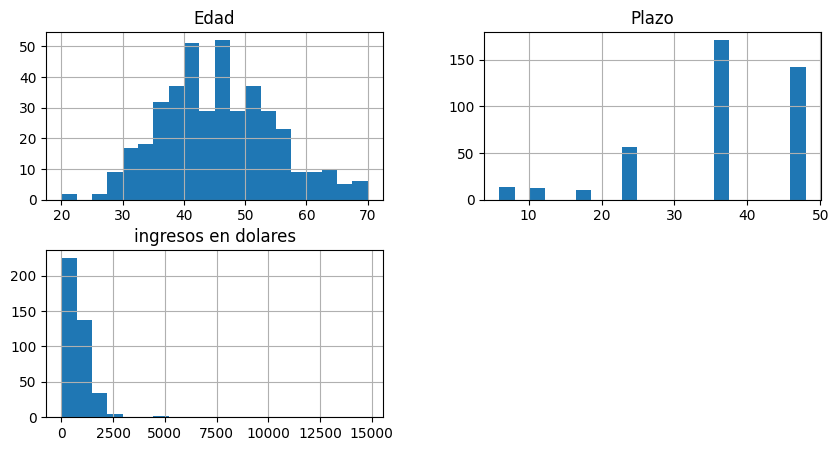

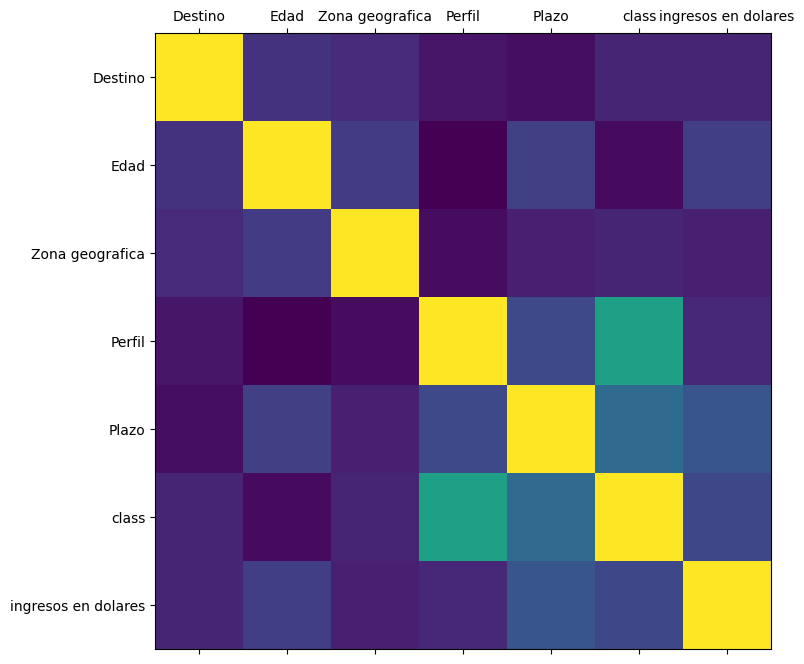

In [5]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
# Representar gráficamente la distribución de los atributos
df_prueba.info()
df_prueba.hist(bins=20, figsize=(10,5))

# Transformamos los valores del atributo class de categoricos a numéricos
df_encoder=df_prueba
labelencoder = LabelEncoder()
df_encoder['Destino']=labelencoder.fit_transform(df_prueba['Destino'])
df_encoder['Perfil']=labelencoder.fit_transform(df_prueba['Perfil'])
df_encoder['Zona geografica']=labelencoder.fit_transform(df_prueba['Zona geografica'])
df_encoder['class']=labelencoder.fit_transform(df_prueba['class'])

# Representar gráficamente la matriz de correlación
corr = df_encoder.corr()
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

# Mostrar la correlación entre los atributos del conjunto de datos
corr_matrix = df_encoder.corr()
corr_matrix["class"].sort_values(ascending=False)


   Destino  Edad  Zona geografica  Perfil  Plazo  class  ingresos en dolares
0       14    45                0       0      6      0          1974.450609
1        5    40               10       1      6      0          4843.271727
2       14    52               14       1     18      0           886.440774
3       15    70                6       1     18      0           416.547102
4       14    57                0       3      6      0           271.800302
          Destino        Edad  Zona geografica      Perfil       Plazo  \
count  406.000000  406.000000       406.000000  406.000000  406.000000   
mean    10.192118   45.293103         5.645320    3.837438   36.325123   
std      5.390667    9.245636         6.678679    1.770311   11.261766   
min      0.000000   20.000000         0.000000    0.000000    6.000000   
25%      6.000000   39.000000         0.000000    3.000000   36.000000   
50%     13.500000   45.000000         4.000000    4.000000   36.000000   
75%     14.000000   

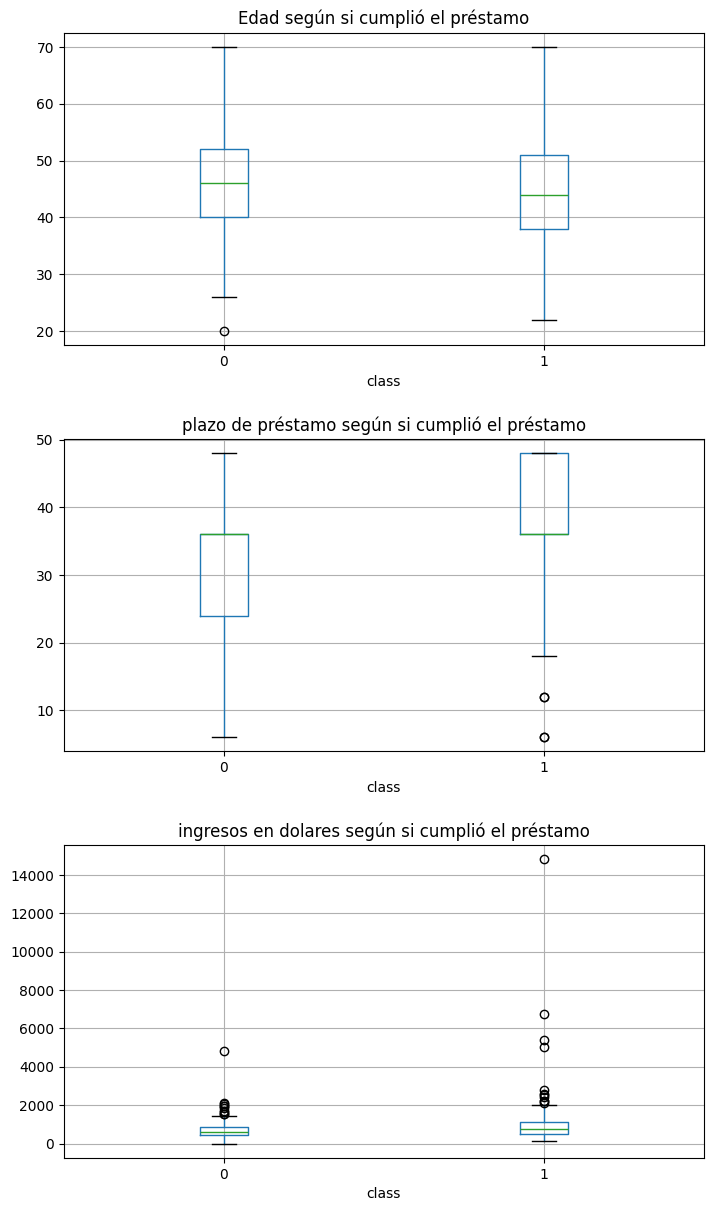

In [33]:
print(df_prueba.head())
print(df_prueba.describe())

#realizamos un boxplot para las variables numéricas 
fig, ax = plt.subplots( 3, figsize=(8, 15))
# Edad
df_prueba.boxplot(column='Edad', by = 'class', ax=ax[0])
ax[0].set_title("Edad según si cumplió el préstamo")

# plazo de préstamo
df_prueba.boxplot(column='Plazo', by = 'class', ax=ax[1])
ax[1].set_title("plazo de préstamo según si cumplió el préstamo")

#ingresos en dolares a la hora de tomar el préstamo 
df_prueba.boxplot(column='ingresos en dolares', by = 'class', ax=ax[2])
ax[2].set_title("ingresos en dolares según si cumplió el préstamo")

fig.suptitle('')
plt.subplots_adjust(hspace=0.3)
plt.show()


In [38]:
#creamos para todas las variables una tabla de contingencia para datos categóricos 
for i in df_prueba.columns:
    if i!= 'ingresos en dolares' and i!='Edad' and i!='Plazo':
        print(pd.crosstab(df_prueba['class'],df_prueba[i], normalize=True, margins=True))

Destino        0         1         2         3         4         5         6  \
class                                                                          
0        0.05665  0.012315  0.004926  0.002463  0.000000  0.012315  0.009852   
1        0.08867  0.017241  0.004926  0.000000  0.017241  0.002463  0.024631   
All      0.14532  0.029557  0.009852  0.002463  0.017241  0.014778  0.034483   

Destino         7         8         9        10        11        12        13  \
class                                                                           
0        0.000000  0.027094  0.002463  0.000000  0.002463  0.024631  0.007389   
1        0.007389  0.017241  0.002463  0.007389  0.029557  0.118227  0.000000   
All      0.007389  0.044335  0.004926  0.007389  0.032020  0.142857  0.007389   

Destino        14        15      All  
class                                 
0        0.169951  0.046798  0.37931  
1        0.231527  0.051724  0.62069  
All      0.401478  0.098522  1.00000 

Longitud del Training Set: 365
Longitud del Validation Set: 21
Longitud del Test Set: 20


<Axes: >

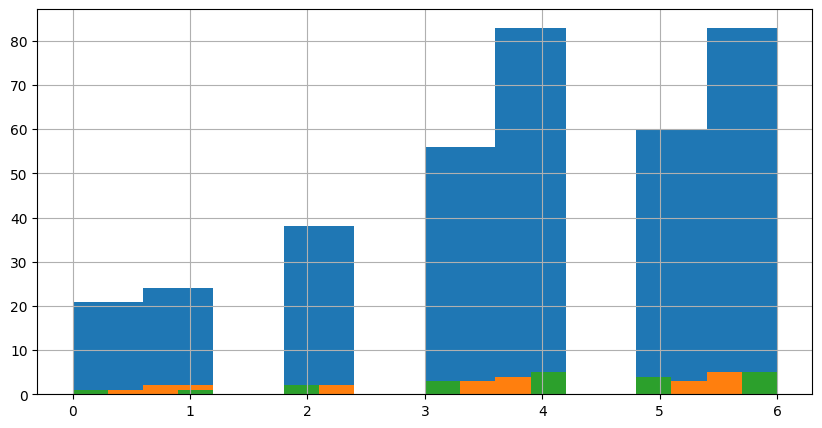

In [39]:
# del conjunto que ya procesamos haremos una división de datos de forma aleatoria - datos de entrenamientos 80% - datos de test 10% - 10% datos de validación 
# Separamos el conjunto de datos 80% train set, 20% test set - como afluenta tiene un rango de score vamos a usar para que la división aleatoria
# se realice de forma proporcional del Perfil.

import sklearn
from sklearn.model_selection import train_test_split
df_prueba
#la función principal de train test split divide en dos conjuntos por esto vamos a realizar una función que me divida en train y set y que tambien el set divida en 2 para tener set y validación
# Construcción de una función que realice el particionado completo se debe poner el fichero, proporcion para train,test,val, y la variable para el stratify
def particionador(df, rstate=42, shuffle=True, st=None):
    strat=df[st]
    train_set, test_set = train_test_split(df, test_size=0.1 , random_state=rstate, shuffle=shuffle , stratify=strat)
    
    df=test_set
    strat=df[st]
    test_set, val_set = train_test_split(df, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    
    return (train_set, val_set, test_set)
    
train_set, val_set, test_set = particionador(df=df_prueba ,rstate=42, shuffle=True, st='Perfil')   

print("Longitud del Training Set:", len(train_set))
print("Longitud del Validation Set:", len(val_set))
print("Longitud del Test Set:", len(test_set))

import matplotlib.pyplot as plt
train_set["Perfil"].hist()
test_set["Perfil"].hist()
val_set["Perfil"].hist(bins=20, figsize=(10,5))

In [7]:
#transformaremos a traves de Sklearn ->LabelEncoder de valores categóricos a numéricos (Destino-Zona Geografica-Perfil-class)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder

# Conjunto de datos general
X_df = df_prueba.drop("class", axis=1)
y_df = df_prueba["class"].copy()
# Conjunto de datos de entrenamiento
X_train = train_set.drop("class", axis=1)
y_train= train_set["class"].copy()
# Conjunto de datos de validación
X_val = val_set.drop("class", axis=1)
y_val = val_set["class"].copy()
# Conjunto de datos de pruebas
X_test = test_set.drop("class", axis=1)
y_test= test_set["class"].copy()
labelencoder = LabelEncoder()

y_df= labelencoder.fit_transform(y_df)
y_train = labelencoder.fit_transform(y_train)
y_val = labelencoder.fit_transform(y_val)
y_test= labelencoder.fit_transform(y_test)

# Transformador para codificar únicamente las columnas categóricas y devolver un df
class CustomOneHotEncoder(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        self._oh = OneHotEncoder()
        self._columns = None
        
    def fit(self, X, y=None):
        X_cat = X.select_dtypes(include=['object'])
        self._columns = pd.get_dummies(X_cat).columns
        self._oh.fit(X_cat)
        return self
        
    def transform(self, X, y=None):
        X_copy = X.copy()
        X_cat = X_copy.select_dtypes(include=['object'])
        X_num = X_copy.select_dtypes(exclude=['object'])
        X_cat_oh = self._oh.transform(X_cat)
        X_cat_oh = pd.DataFrame(X_cat_oh.toarray(), 
                                columns=self._columns, 
                                index=X_copy.index)
        X_copy.drop(list(X_cat), axis=1, inplace=True)
        return X_copy.join(X_cat_oh)
    
# Construcción de un pipeline para los atributos numéricos
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('rbst_scaler', RobustScaler()),
    ])    

# Transformador que prepara todo el conjunto de datos llamando pipelines y transformadores personalizados
class DataFramePreparer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        self._full_pipeline = None
        self._columns = None
        
    def fit(self, X, y=None):
        num_attribs = list(X.select_dtypes(exclude=['object']))
        cat_attribs = list(X.select_dtypes(include=['object']))
        self._full_pipeline = ColumnTransformer([
                ("num", num_pipeline, num_attribs),
                ("cat", CustomOneHotEncoder(), cat_attribs),
        ])
        self._full_pipeline.fit(X)
        self._columns = pd.get_dummies(X).columns
        return self
        
    def transform(self, X, y=None):
        X_copy = X.copy()
        X_prep = self._full_pipeline.transform(X_copy)
        return pd.DataFrame(X_prep, 
                            columns=self._columns, 
                            index=X_copy.index)

# Instanciamos nuestro transformador personalizado
data_preparer = DataFramePreparer()

# Hacemos el fit con el conjunto de datos general para que adquiera todos los valores posibles
data_preparer.fit(X_df)

# Transformamos el subconjunto de datos de entrenamiento
X_train_prep = data_preparer.transform(X_train)


X_train_prep.head(5)

# Transformamos el subconjunto de datos de validación
X_val_prep = data_preparer.transform(X_val)


In [8]:
#entrenamiento, luego de preparar los datos empezaremos a realizar los entrenamientos 

# Entrenamos un algoritmo basado en regresión logística
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver="newton-cg", max_iter=1000)
clf.fit(X_train_prep, y_train)


LogisticRegression(max_iter=1000, solver='newton-cg')

F1 score utilizando regresión logística con datos de validación: 0.9285714285714286
F1 score utilizando regresión logística con datos de testeo: 0.88


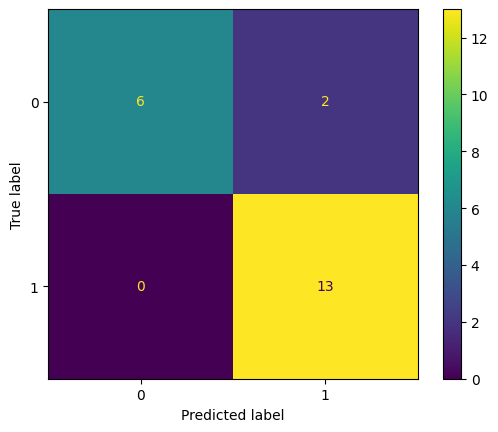

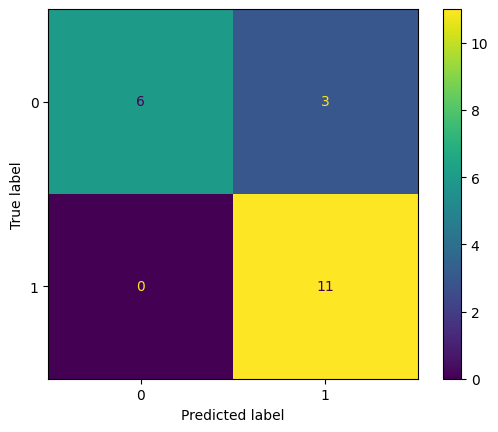

In [9]:
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
#Realizamos una predicción con el modelo generado anteriormente tras el entrenamiento del algoritmo de Regresión Logística. Utilizamos el subconjunto de validación.
y_pred = clf.predict(X_val_prep)
print("F1 score utilizando regresión logística con datos de validación:", f1_score(y_val, y_pred))
confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay.from_estimator(clf, X_val_prep, y_val, values_format='d')

# Transformamos el subconjunto de datos de validación
X_test_prep = data_preparer.transform(X_test)
y_pred = clf.predict(X_test_prep)
ConfusionMatrixDisplay.from_estimator(clf, X_test_prep, y_test, values_format='d')
print("F1 score utilizando regresión logística con datos de testeo:", f1_score(y_test, y_pred))

F1 Score datos de validación utilizando gaussian kernel: 0.9285714285714286
F1 Score con datos de testeo utilizando gaussian kernel: 0.8


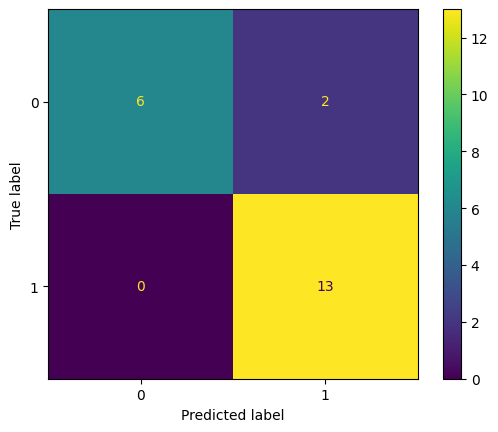

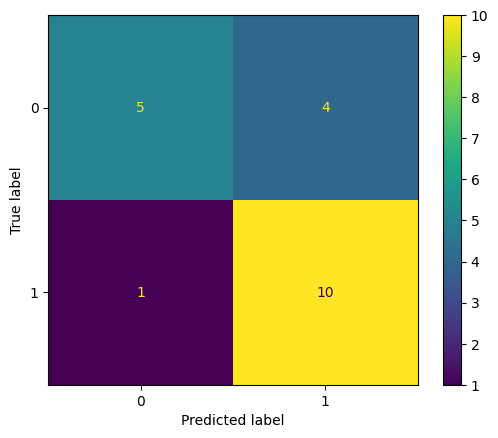

In [10]:
# Entrenamiento con metodo gaussian kernel 
from sklearn.svm import SVC

rbf_kernel_svm_clf = Pipeline([
            ("scaler", RobustScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=0.00005, C=100000))
        ])
#con datos de validación
rbf_kernel_svm_clf.fit(X_train_prep, y_train)
y_pred = rbf_kernel_svm_clf.predict(X_val_prep)
print("F1 Score datos de validación utilizando gaussian kernel:", f1_score(y_pred, y_val))
ConfusionMatrixDisplay.from_estimator(rbf_kernel_svm_clf, X_val_prep, y_val, values_format='d')

#con datos de testeo
y_pred_test = rbf_kernel_svm_clf.predict(X_test_prep)
print("F1 Score con datos de testeo utilizando gaussian kernel:", f1_score(y_pred_test, y_test))
ConfusionMatrixDisplay.from_estimator(rbf_kernel_svm_clf, X_test_prep, y_test, values_format='d')

F1 Score datos de validación sin preparar utilizando Arbol de decisión: 0.8148148148148148
F1 Score datos de testeo sin preparar utilizando Arbol de decisión: 0.8
F1 Score datos de validación preparados utilizando Arbol de decisión: 0.8148148148148148
F1 Score datos de testeo preparado utilizando Arbol de decisión: 0.8


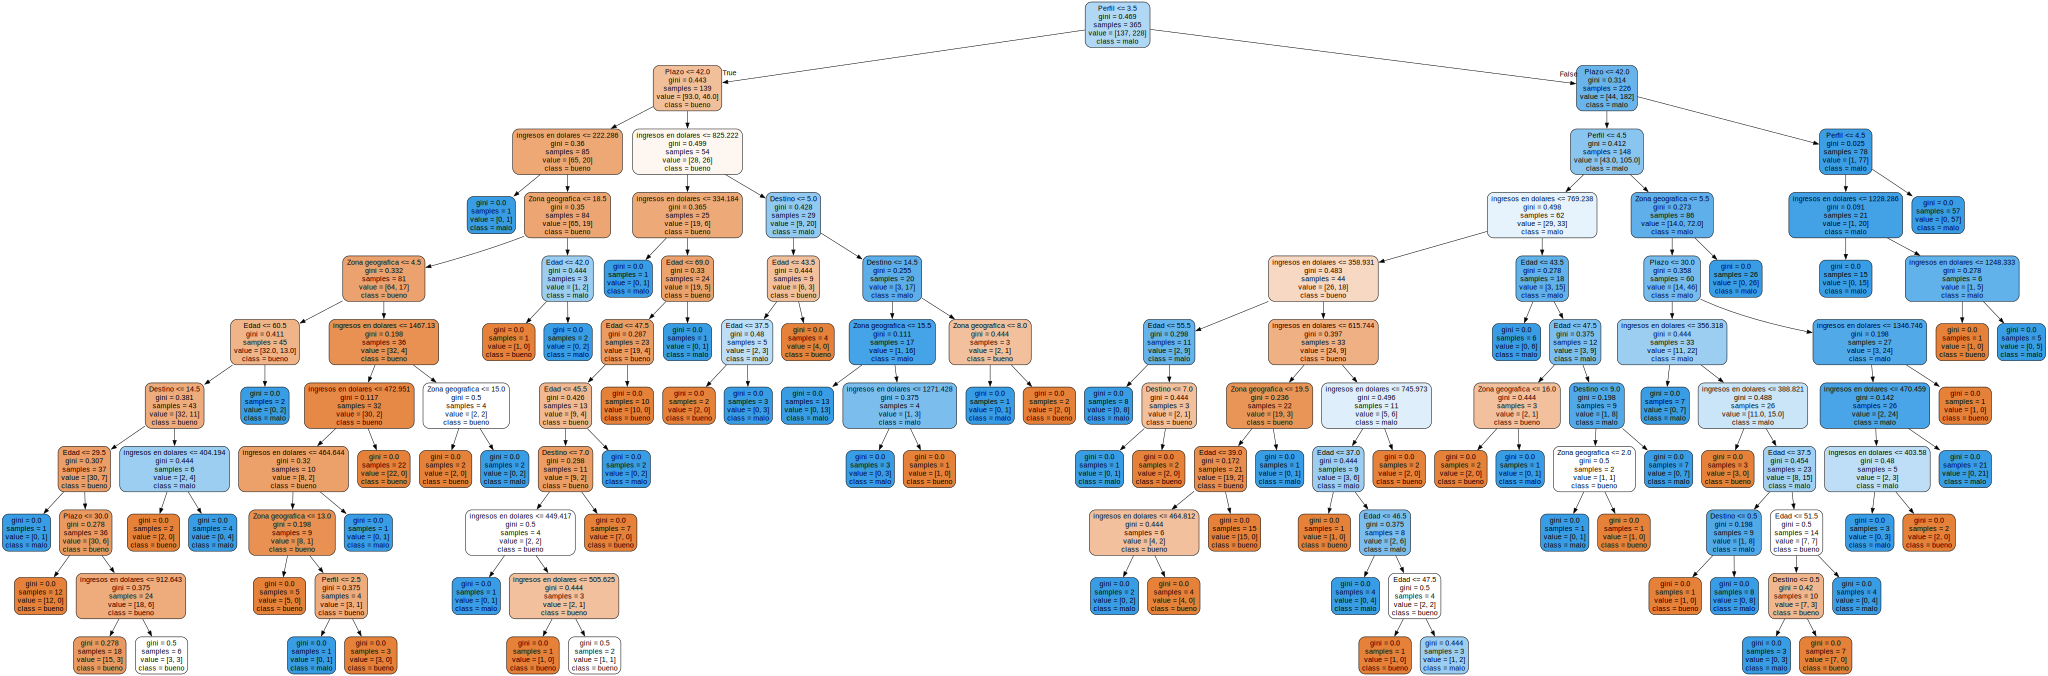

In [11]:
from sklearn.tree import DecisionTreeClassifier

MAX_DEPTH = 10

# Modelo entrenado con el conjunto de datos
clf_tree = DecisionTreeClassifier(max_depth=MAX_DEPTH, random_state=42)
clf_tree.fit(X_train, y_train)

# Modelo entrenado con el conjunto de datos escalado
clf_tree_prep = DecisionTreeClassifier(max_depth=MAX_DEPTH, random_state=42)
clf_tree_prep.fit(X_train_prep, y_train)


# Predecimos con valores de validación sin preparar
y_val_pred = clf_tree.predict(X_val)
# Predecimos con valores de validación preparado
y_val_pred_prep = clf_tree_prep.predict(X_val_prep)

# Predecimos con valores preparados de testeo
y_test_pred_prep = clf_tree_prep.predict(X_test_prep)
# Predecimos con valores de testeo sin preparar
y_test_pred = clf_tree.predict(X_test)


print("F1 Score datos de validación sin preparar utilizando Arbol de decisión:", f1_score(y_val_pred , y_val))
print("F1 Score datos de testeo sin preparar utilizando Arbol de decisión:", f1_score(y_test_pred , y_test))


print("F1 Score datos de validación preparados utilizando Arbol de decisión:", f1_score(y_val_pred_prep , y_val))
print("F1 Score datos de testeo preparado utilizando Arbol de decisión:", f1_score(y_test_pred_prep , y_test))

# Pintamos el árbol para compararlo con la representación gráfica anterior
from graphviz import Source
from sklearn.tree import export_graphviz
import os
# Preparados
export_graphviz(
        clf_tree,
        out_file="analisis_de_prestamos_preparados.dot",
        feature_names=X_train.columns,
        class_names=["bueno", "malo"],
        rounded=True,
        filled=True
    )

Source.from_file("analisis_de_prestamos_preparados.dot")

# sin Preparar
export_graphviz(
        clf_tree,
        out_file="analisis_de_prestamos_sin_preparar.dot",
        feature_names=X_train_prep.columns,
        class_names=["bueno", "malo"],
        rounded=True,
        filled=True
    )

Source.from_file("analisis_de_prestamos_sin_preparar.dot")


In [12]:
from sklearn.ensemble import RandomForestClassifier

# Modelo entrenado con el conjunto de datos sin escalar
clf_rnd = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf_rnd.fit(X_train, y_train)

# Predecimos con el conjunto de datos de validación
y_val_pred = clf_rnd.predict(X_val)

# Predecimos con el conjunto de datos de validación
y_test_pred = clf_rnd.predict(X_test)

print("F1 Score datos de validación sin preparar utilizando Arbol de decisión:", f1_score(y_val_pred , y_val))
print("F1 Score datos de test sin preparar utilizando Arbol de decisión:", f1_score(y_test_pred , y_test))


F1 Score datos de validación sin preparar utilizando Arbol de decisión: 0.9230769230769231
F1 Score datos de test sin preparar utilizando Arbol de decisión: 0.8695652173913043
